# Population Density Data

### Introduction 
Hypothetically if an apocalypse were to happen, the chance of survival in a city like Pittsburgh would be very slim. So if you kept some cognitive function as a zombified person, where would you go? Movies and other media have always given survival guides for how to survive, but it would be the complete opposite for a zombie's survival. So, in theory, it would be best for a neighborhood to have a high population along with land area, be a walkable neighborhood, and have people that are overwhelmingly obese. 

### Metric
For a zombie to have the best chance of survival, there needs to be many people who aren't close together. If they were close together, they would all be able to team up and kill the zombie, so there needs to be a neighborhood with just the right balance of people and land. That's why we extracted the population and land area from the Pittsburgh SNAP Census Data to determine which neighborhood is best. 

In [1]:
# load pandas, geopandas, numpy, shapely, and matplotlib
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline

# load population density data 
popden = pd.read_csv("population-density.xls.csv",index_col = "Neighborhood")

# displays original dataset
popden

,Sector #,Pop. 1940,Pop. 1950,Pop. 1960,Pop. 1970,Pop. 1980,Pop. 1990,Pop. 2000,Pop. 2010,"% Pop. Change, 60-70",...,% Other (2010),% White (2010),% 2+ Races (2010),% Hispanic (of any race) (2010),% Pop. Age < 5 (2010),% Pop. Age 5-19 (2010),% Pop. Age 20-34 (2010),% Pop. Age 35-59 (2010),% Pop. Age 60-74 (2010),% Pop. Age > 75 (2010)
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,3,4521,3862,2512,632,1586,1262,886,933,-74.84%,...,0.64%,40.84%,0.0397,0.029,0.0419,0.2170,0.2757,0.2243,0.1761,0.0650
Allegheny West,3,3210,3313,2170,1124,820,654,508,462,-48.20%,...,0.65%,76.62%,0.0303,0.028,0.0000,0.0000,0.0837,0.6820,0.1255,0.1088
Allentown,6,8227,7487,6416,5361,4292,3600,3220,2500,-16.44%,...,0.80%,59.40%,0.0464,0.023,0.0366,0.1485,0.2411,0.3530,0.1440,0.0767
Arlington,7,2702,3203,4430,3949,2294,2210,1999,1869,-10.86%,...,0.37%,76.46%,0.0316,0.014,0.0691,0.1889,0.1945,0.3153,0.0888,0.1433
Arlington Heights,7,2413,2860,2272,2037,1466,1497,238,244,-10.34%,...,1.64%,9.43%,0.0492,0.008,0.0410,0.3925,0.1638,0.3072,0.0341,0.0614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,13,6848,6164,5221,4482,3710,3328,2899,2669,-14.15%,...,1.80%,65.72%,0.0296,0.031,0.0643,0.2217,0.2448,0.2957,0.1194,0.0540
West End,4,1984,1820,1702,920,604,441,466,254,-45.95%,...,1.18%,53.15%,0.0748,0.004,0.0000,0.2586,0.2931,0.0862,0.2672,0.0948
West Oakland,14,2952,4073,3658,3140,2955,1938,2272,2604,-14.16%,...,0.50%,52.73%,0.0177,0.023,0.0193,0.3886,0.2938,0.1701,0.0806,0.0476


In [2]:
# changes pop. 2010 and land area(acres) from strings to int/float
popden['Pop. 2010'] = popden['Pop. 2010'].astype(int)
popden['Land Area (acres)'] = popden['Land Area (acres)'].astype(float)

# ranks population, land area, and final ranking
popden['Pop. 2010 Ranking'] = popden['Pop. 2010'].rank(ascending = False)
popden['Land Area Ranking'] = popden['Land Area (acres)'].rank(ascending = False)
popden['Average Ranking'] = (popden['Pop. 2010 Ranking'] + popden['Land Area Ranking'])/2

# filters data to display only pop. 2010, land area(acres), and rankings
rpopden = popden.iloc[:,[8,16,33,34,35]]

# sorts data by final ranking
rpopden.sort_values(by = ['Average Ranking']).head(10)

,Pop. 2010,Land Area (acres),Pop. 2010 Ranking,Land Area Ranking,Average Ranking
Neighborhood,,,,,
Squirrel Hill South,15110,1709.44,1.0,1.0,1.0
Brookline,13214,1332.48,3.0,2.0,2.5
Carrick,10113,1070.72,6.0,5.0,5.5
Squirrel Hill North,11363,782.08,4.0,9.0,6.5
Beechview,7974,934.40,9.0,7.0,8.0
Mount Washington,8799,729.60,7.0,12.0,9.5
Shadyside,13915,589.44,2.0,20.0,11.0
Lincoln-Lemington-Belmar,4883,1159.68,20.0,3.0,11.5
Brighton Heights,7247,714.88,11.0,13.0,12.0


In [3]:
# read shapefiles
neighborhoods = gpd.read_file('Neighborhoods/Neighborhoods_.shp')

# do the merge
neighborhoods_map = neighborhoods.merge(rpopden, how='left', left_on='hood', right_on='Neighborhood')

# look at the head to confirm it merged correctly
neighborhoods_map[['hood','Pop. 2010','Land Area (acres)','geometry']].head()

,hood,Pop. 2010,Land Area (acres),geometry
0,Central Oakland,6086,179.84,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,10551,319.36,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,2604,137.60,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,2256,165.12,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,616,389.12,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


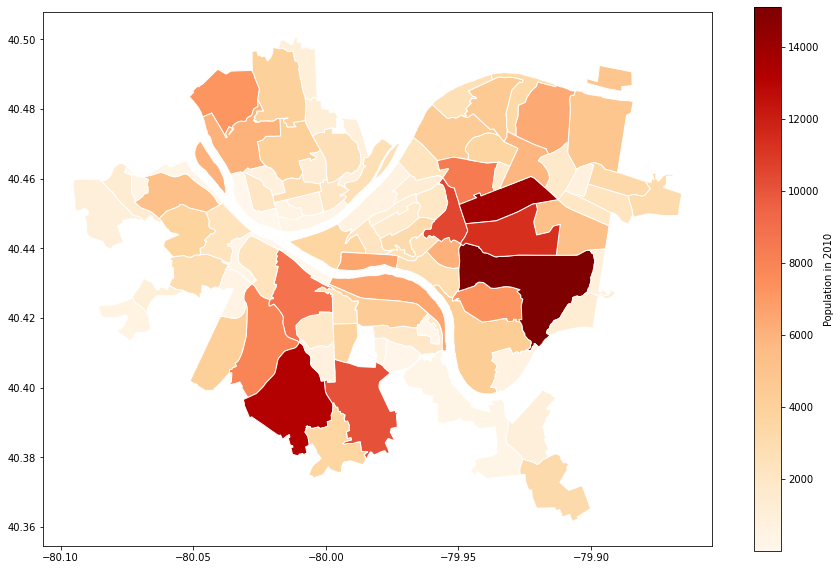

In [4]:
neighborhoods_map.plot(column='Pop. 2010',                            # set the data to be used for coloring
                       cmap='OrRd',                                   # choose a color palette
                       edgecolor="white",                             # outline the districts in white
                       legend=True,                                   # show the legend
                       legend_kwds={'label': "Population in 2010"},   # label the legend
                       figsize=(15, 10),                              # set the size
                       ) 

In [ ]:
neighborhoods_map.plot(column= 'Land Area (acres)',                   # set the data to be used for coloring
                       cmap='OrRd',                                   # choose a color palette
                       edgecolor="white",                             # outline the districts in white
                       legend=True,                                   # show the legend
                       legend_kwds={'label': "Land Area(acres)"},     # label the legend
                       figsize=(15, 10),                              # set the size
                       ) 

### Best Neighborhood
Using the population density metrifc we found that the best neighborhood in Pittsburgh was Squirrel Hill South. This is proved by it having the highest ranking for both population and for land area. It is corrobated by the map visulation where it is the only part of the map to be in the darkest red for both population and land area.

### Conclusion
My personal neighborhood is Oakland because as a student it has everything I could possibly want in close proxiemety to each other. I'm not a Pittsburgh native so I haven't really gotten out of Oakland since there's really no reason to with all the stuff that's present in the neighborhood. However, I'm not a zombie so our best neighborhood of Squierrel Hill South would of course be differ from my personal favorite neighborhood. There is no doubt in my mind that Squierrel Hill South wouldn't be the victor for best place for zombie surival as it is overwhelming victorious compared to other neighborhood